Import Dataset

In [ ]:
!wget -p https://drive.google.com/file/d/1EL-3BJVjr1MDskTzdxbUXXO1u6GQS5Fl/view?usp=sharing

--2022-12-14 16:27:18--  https://drive.google.com/file/d/1EL-3BJVjr1MDskTzdxbUXXO1u6GQS5Fl/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.251.10.138, 142.251.10.113, 142.251.10.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.10.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘drive.google.com/file/d/1EL-3BJVjr1MDskTzdxbUXXO1u6GQS5Fl/view?usp=sharing’

drive.google.com/fi     [ <=>                ]  72.50K  --.-KB/s    in 0.02s   

2022-12-14 16:27:19 (3.76 MB/s) - ‘drive.google.com/file/d/1EL-3BJVjr1MDskTzdxbUXXO1u6GQS5Fl/view?usp=sharing’ saved [74237]

FINISHED --2022-12-14 16:27:19--
Total wall clock time: 0.7s
Downloaded: 1 files, 72K in 0.02s (3.76 MB/s)


Import necessary modules

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

Construct an encoder to classify results

Pre-process dataset

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

In [ ]:
data = np.array(data)
data.shape

In [ ]:
result = np.array(result)
result = result.reshape(data.shape[0], 2)

Construct the neural network model

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

#Construct activation layer
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

#Summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 150, 150, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 150, 150, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

Train the model

In [ ]:
checkpoint = ModelCheckpoint("model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
history = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/10
462/462 [==============================] - 160s 347ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 6.1868e-04 - val_accuracy: 1.0000
Epoch 3/10
462/462 [==============================] - 160s 347ms/step - loss: 0.0079 - accuracy: 0.9986 - val_loss: 2.4798e-05 - val_accuracy: 1.0000
Epoch 4/10
462/462 [==============================] - 162s 351ms/step - loss: 7.8363e-04 - accuracy: 1.0000 - val_loss: 1.3226e-06 - val_accuracy: 1.0000
Epoch 5/10
462/462 [==============================] - 160s 347ms/step - loss: 8.2996e-04 - accuracy: 1.0000 - val_loss: 2.0715e-06 - val_accuracy: 1.0000
Epoch 6/10
462/462 [==============================] - 160s 347ms/step - loss: 0.0091 - accuracy: 0.9976 - val_loss: 3.1622e-04 - val_accuracy: 1.0000
Epoch 7/10
462/462 [==============================] - 160s 347ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0038 - val_accuracy: 0.9989
Epoch 8/10
462/462 [==============================] - 160s 347ms/step - loss: 2.8058e-04 - accur

Plot the loss and accuracy

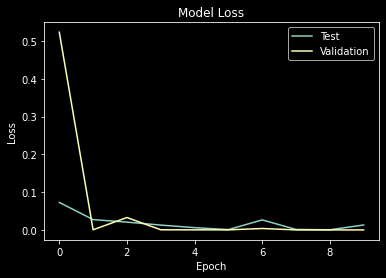

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

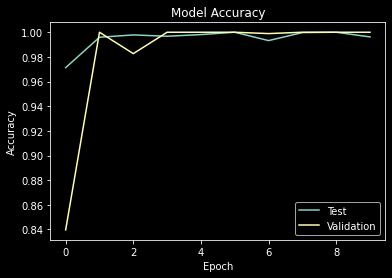

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

In [ ]:
def names(number):
  return 'Negative' if number==0.0 else 'Positive'

Confidence score: 99.99991655349731%
Result: Positive


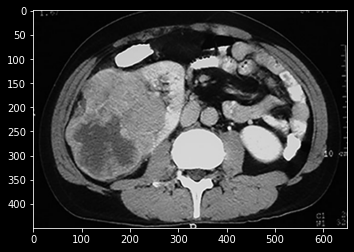

In [ ]:
# Manual Testing
img = image.load_img("image.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

Confidence score: 100.0%
Result: Negative


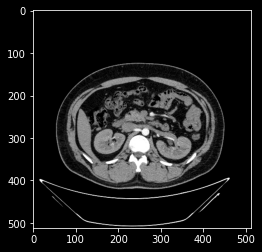

In [ ]:
# Test_2 for random image
from matplotlib.pyplot import imshow
img = Image.open(r"/content/dataset/Test/Normal/Normal- (4198).jpg")
x = np.array(img.resize((299,299)))
x = x.reshape(1,299,299,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print('Confidence score:', str(res[0][classification]*100) + '%')
print('Result:', names(classification))

Text(0, 0.5, 'True Positive Rate')

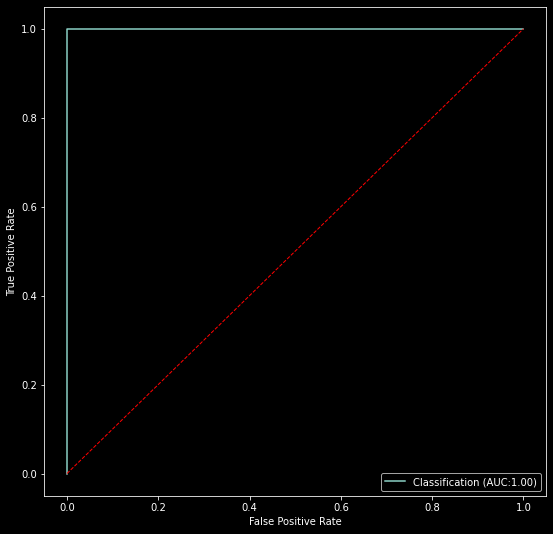

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score
from matplotlib.pyplot import figure

# Confusion matrix
p_y = model.predict(x_test, verbose=False)
fpr, tpr, th = roc_curve(y_test.argmax(axis=1), p_y.argmax(axis=1), pos_label=1)
fig, c_ax = plt.subplots(1,1, figsize=(9, 9))
c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Classification', auc(fpr, tpr)))
c_ax.plot([0,1], [0,1], color='red', lw=1, linestyle='--')
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

Text(0, 0.5, 'Precision')

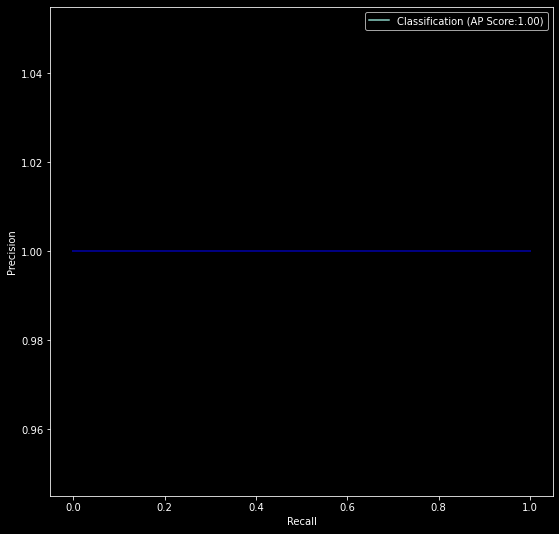

In [ ]:
# Precision and Recall
p_y = model.predict(x_test, verbose=False)
fig, c_ax = plt.subplots(1,1, figsize=(9, 9))
p, r, th = precision_recall_curve(y_test.argmax(axis=1), p_y.argmax(axis=1), pos_label=1)
aps = average_precision_score(y_test, p_y)
c_ax.plot(r, p, label = '%s (AP Score:%0.2f)'  % ('Classification', aps))
c_ax.plot(r, p, color='navy', lw=2)
c_ax.legend()
c_ax.set_xlabel('Recall')
c_ax.set_ylabel('Precision')

In [ ]:
def calculate_f1(p, r):
  return 2*(p*r)/(p+r) if r and p else 0

p, r, th = precision_recall_curve(y_test.argmax(axis=1), model.predict(x_test, verbose=False).argmax(axis=1))
f1_score = [calculate_f1(p[i], r[i]) for i in range(len(th))]
idx = np.argmax(f1_score)

print('====================================================')
print('                       Results')
print('====================================================\n')
print('Precision:', str(p[idx]))
print('Recall   :', str(r[idx]))
print('Threshold:', str(th[idx]))
print('F1 Score :', str(f1_score[idx]))
print('====================================================')

                       Results

Precision: 1.0
Recall   : 1.0
Threshold: 1
F1 Score : 1.0


In [ ]:
model.save('/content/model_tumor_normal_new.h5')

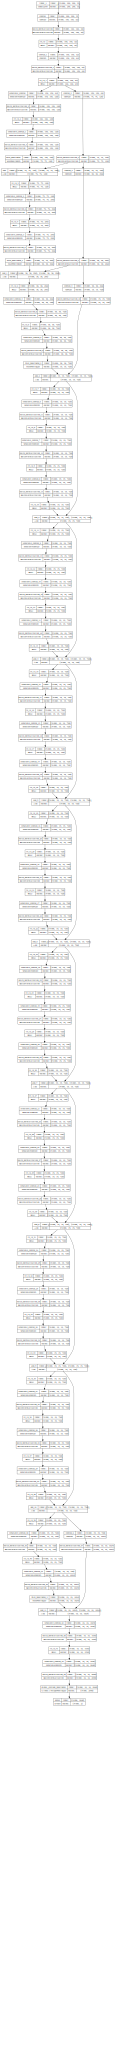

In [ ]:
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
import pydot
import graphviz

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB',expand_nested=False, dpi=60, subgraph=False).create(prog='dot',format='svg'))